# Diabetes Prediction by Classification.

In [2]:
import pandas as pd

# load the training dataset
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [3]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
  Label: 0
Patient 2 
  Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
  Label: 0
Patient 3 
  Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
  Label: 0
Patient 4 
  Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
  Label: 1


### Now let's compare the feature distributions for each label value.

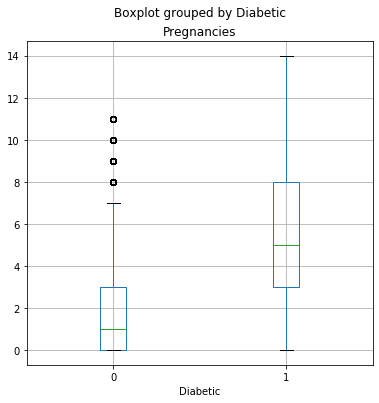

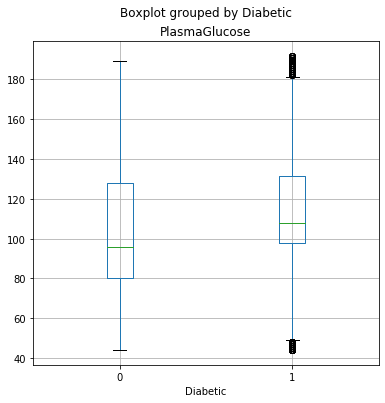

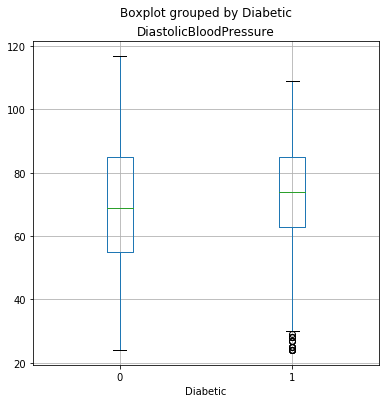

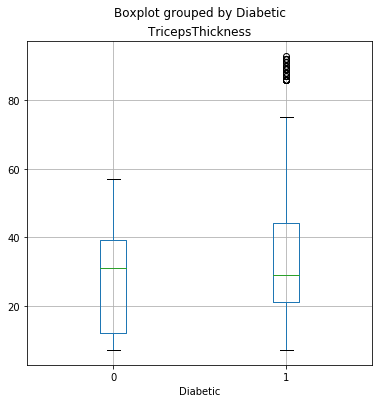

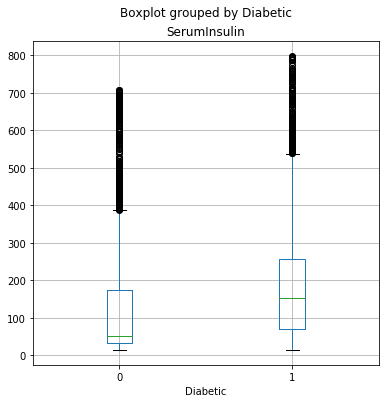

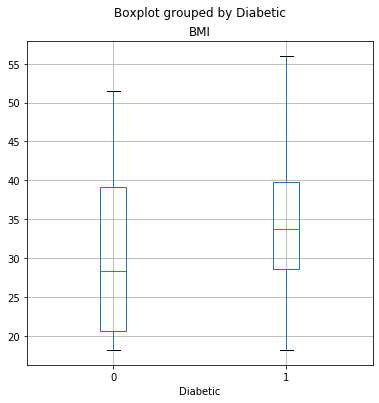

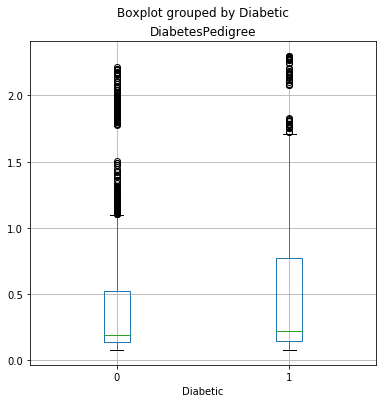

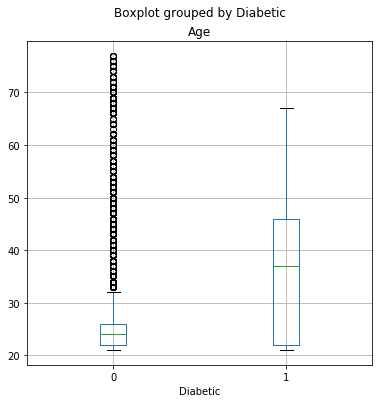

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()

For some of the features, there's a noticable difference in the distribution for each label value. In particular, Pregnancies and Age show markedly different distributions for diabetic patients than for non-diabetic patients. These features may help predict whether or not a patient is diabetic.

### Split Training and Test Data

In [5]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.size, X_test.size))

Training cases: 84000
Test cases: 36000


### Train and Evaluate a Binary Classification Model

In [6]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


### Make Prediction

In [11]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


In [12]:
predictions

array([0, 0, 0, ..., 0, 1, 0])

### Model Validation

In [13]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7891111111111111


In [14]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



The classification report includes the following metrics:

- Precision: The proportion of positive (1) predictions that were in fact positive.
- Recall: The proportion of actual positive cases that the classifier correctly identified.
- F1-Score: An average metric that takes both precision and recall into account.
- Support: A weighted average of prevelance for the two classes.

The precision and recall metrics are derived from four core metrics:

- True Positives: The predicted label and the actual label are both 1.
- False Positives: The predicted label is 1, but the actual label is 0.
- False Negatives: The predicted label is 0, but the actual label is 1.
- True Negatives: The predicted label and the actual label are both 0.

These metrics are generally shown together as a *confusion matrix*, which takes the following form:

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="lightgray">TN</td><td style="border: 1px solid black;color: black;" bgcolor="white">FP</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="white">FN</td><td style="border: 1px solid black;color: black;" bgcolor="lightgray">TP</td>
    </tr>
</table>

In Python, you can use the sklearn.metrics.confusion_matrix function to find these values for a trained classifier:

In [15]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2638  348]
 [ 601  913]]


In [16]:
# Display the probabilities of each pair
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.81654128 0.18345872]
 [0.96286375 0.03713625]
 [0.80834451 0.19165549]
 ...
 [0.60686857 0.39313143]
 [0.10733019 0.89266981]
 [0.63932007 0.36067993]]


The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilties are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall) and the false positive rate for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a received operator characteristic (ROC) chart, like this:

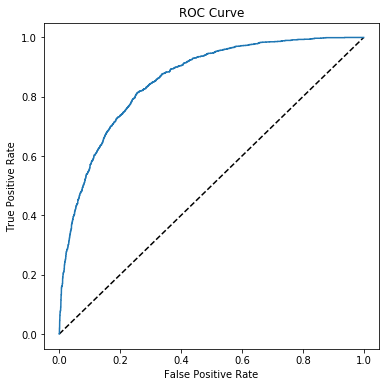

In [17]:
# Evaluate the model
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, Scikit-Learn includes a function to calculate this metric.

In [20]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ', auc)

AUC:  0.8568573200696159


In this case, the ROC curve and its AUC indicate that the model performs better than a random guess.

Use the Model for Inferencing
Now that we have a reasonably useful trained model, we can save it for use later to predict labels for new data:

### Saving the Model

In [21]:
import joblib

# Save the model as a pickle file
filename = './models/diabetes_model.pkl'
joblib.dump(model, filename)

['./models/diabetes_model.pkl']

### Using Model to make Predictions

In [22]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = [[2,180,74,24,21,23.9091702,1.488172308,22]]
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2, 180, 74, 24, 21, 23.9091702, 1.488172308, 22]
Predicted class is 0


### Train a Multiclass Classification Model
Binary classification techniques work well when the data observations belong to one of two classes or categories, such as "True" or "False". When the data can be categorized into more than two classes, you must use a multiclass classification algorithm.

Fortunately, in most machine learning frameworks, including scikit-learn, implementing a multiclass classifier is not significantly more complex than binary classification - and in many cases, the classification algorithm classes used for binary classification implicitly support multiclass classification.

Let's start by examining a dataset that contains observations of multiple classes. We'll use one of the most commonly used examples in machine learning - the ***Iris*** dataset, in which characteristics of iris flowers are recorded along with the specific species of iris.

This dataset is so commonly used in machine learning examples, it's available directly from the scikit-learn library. Run the following cell to load it:

In [31]:
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

The dataset in scikit-learn consists of:
* A description of the dataset
* An array named **data** containing the feature values
* An array named **feature_names** containing the names of the features (*sepal length*, *sepal width*, *petal length*, and *petal width*).
* An array named **target** containing the corresponding labels
* An array named **target_names** containing the species names that correspond to each possible label value (*setosa*, *versicolor*, and *virginica*).

Let's combine the features and label values into a dataframe and look at a sample of them:

In [32]:
import numpy as np
import pandas as pd

features = pd.DataFrame(data = np.c_[iris.data,iris.target], columns = iris.feature_names + ['label'])
features.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
135,7.7,3.0,6.1,2.3,2.0
39,5.1,3.4,1.5,0.2,0.0
33,5.5,4.2,1.4,0.2,0.0
109,7.2,3.6,6.1,2.5,2.0
66,5.6,3.0,4.5,1.5,1.0
20,5.4,3.4,1.7,0.2,0.0
119,6.0,2.2,5.0,1.5,2.0
112,6.8,3.0,5.5,2.1,2.0
93,5.0,2.3,3.3,1.0,1.0
64,5.6,2.9,3.6,1.3,1.0


The labels in the dataset are 0, 1, and 2. Let's see what those labels correspond to in terms of species names:

In [33]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [34]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.30, random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (x_train.size, x_test.size))

print("Sample of features and labels:")
# Take a look at the first 10 training features and corresponding labels
for n in range(0,9):
    print(x_train[n], y_train[n], '(' + iris.target_names[y_train[n]] + ')')

Training Set: 420, Test Set: 180 

Sample of features and labels:
[5.  2.  3.5 1. ] 1 (versicolor)
[6.5 3.  5.5 1.8] 2 (virginica)
[6.7 3.3 5.7 2.5] 2 (virginica)
[6.  2.2 5.  1.5] 2 (virginica)
[6.7 2.5 5.8 1.8] 2 (virginica)
[5.6 2.5 3.9 1.1] 1 (versicolor)
[7.7 3.  6.1 2.3] 2 (virginica)
[6.3 3.3 4.7 1.6] 1 (versicolor)
[5.5 2.4 3.8 1.1] 1 (versicolor)


In [35]:
from sklearn.ensemble import RandomForestClassifier


# train a random forest model on the training set
multi_model = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)
print (multi_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [36]:
iris_predictions = multi_model.predict(x_test)
print('Predicted labels: ', iris_predictions[:15])
print('Actual labels   : ' ,y_test[:15])

Predicted labels:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]
Actual labels   :  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1]


In [37]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, iris_predictions))

Accuracy:  0.9777777777777777


In [38]:
from sklearn. metrics import classification_report

print(classification_report(y_test, iris_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [39]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_test, iris_predictions)
print(mcm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


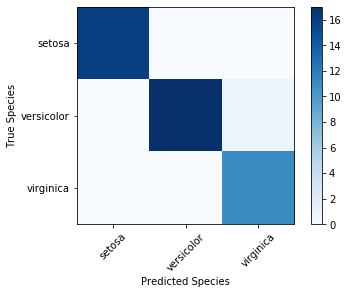

In [40]:
# visualize with a heatmap
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)
plt.xlabel("Predicted Species")
plt.ylabel("True Species")
plt.show()

In [41]:
import joblib

# Save the model as a pickle file
filename = './models/iris_model.pkl'
joblib.dump(multi_model, filename)

['./models/iris_model.pkl']

In [42]:
# Load the model from the file
multi_model = joblib.load(filename)

# The model accepts an array of feature arrays (so you can predict the classes of multiple iris observations in a single call)
# We'll create an array with a single array of features, representing one iris
x_new = [[6.6,3.2,5.8,2.4]]
print ('New sample: {}'.format(x_new[0]))

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one iris, so our prediction is the first one in the resulting array.
iris_pred = multi_model.predict(x_new)[0]
print('Predicted class is', iris.target_names[iris_pred])

New sample: [6.6, 3.2, 5.8, 2.4]
Predicted class is virginica


In [44]:
# You can also submit a batch of iris observations to the model, and get back a prediction for each one.
# This time our input is an array of two feature arrays
x_new = [[6.6,3.2,5.8,2.4],
         [5.6, 2.5, 3.9, 1.1]]
print ('New sample: {}'.format(x_new))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + iris.target_names[prediction] +')')

New sample: [[6.6, 3.2, 5.8, 2.4], [5.6, 2.5, 3.9, 1.1]]
2 (virginica)
1 (versicolor)
